<font color='Red'>$
{\huge Simple \ Linear \ Regression \ from \ Scratch }$</font>



Author: Meet Data
    
YouTube Lecture Link: https://youtu.be/Fc-reyy2J9I

<font color='Blue'>${\huge Matrix  }$</font>

This tutorial shows how to do simple linear regression from scratch just using NumPy. The following is the function:

$$Y = XB $$



> where,

> $Y=\left[ \begin{array} {} y_1 \\ y_2 \\ y_3 \\ ..\\y_n   \end{array} \right]$

> $X= \left[ \begin{array} {} 1 & x_1 \\ 1 & x_2 \\ 1 & x_3 \\..\\1 & x_n   \end{array} \right]$

> $B= \left[ \begin{array} {} b_0 \\b_1   \end{array} \right] $


$x_1, x_2 ...x_n $ and $y_1, y_2, ..., y_n$ are observations, namely sample data. $b_0$ and $b_1$ are ones that we need to calculate from the sample data.

>  We can write $Y=XB$ using an expanded format, namely matrix format, as well:

$$\left[ \begin{array} {} y_1 \\ y_2 \\ y_3 \\ ..\\y_n   \end{array} \right] = \left[ \begin{array} {} b_0+b_1 x_1 \\ b_0+b_1 x_2 \\ b_0+b_1 x_3 \\..\\b_0+b_1 x_n   \end{array} \right] $$

We can multiple the transpose of matrix, namely $X^T$ on both sizes:

$$X^TY =X^T X B $$



Next, we can multiple the inverse matrix of $X^TX$ on both sizes:

$$(X^T X)^{-1} X^TY =(X^T X)^{-1} X^T X B $$

$$(X^T X)^{-1} X^TY = B $$


Thus, the following is the final matrix calculation we need to work on to calculate $b_0$ and $b_1$:

$$B =(X^T X)^{-1} X^TY$$

Note: If we use NumPy, we do not really need to know how to do this manually. We just need to know how to write the formula statement using functions in NumPy.


<font color='Blue'>${\huge Example: Data \ and \ Code }$</font>

Suppose X is the price and Y is sales and we would like to see whether price X can predict sales Y.

$$Sales = Price \times B$$

<font color='Blue'>${\large Generating \ Data  }$</font>

In [18]:
import numpy as np
X_matrix = np.array([np.ones(5),[2,6,7,8,5]])
X_matrix=X_matrix.T
print("X matrix:\n", X_matrix)

X matrix:
 [[1. 2.]
 [1. 6.]
 [1. 7.]
 [1. 8.]
 [1. 5.]]


In [19]:
Y_matrix = np.array([[50,30,10,5,45]])
Y_matrix=Y_matrix.T
print("Y matrix:\n",Y_matrix)

Y matrix:
 [[50]
 [30]
 [10]
 [ 5]
 [45]]


<font color='Blue'>${\large Matrix \ Calculation  }$</font>

Since we have got the data, we need to use NumPy to do the calculation. We need to use 3 basic NumPy functions.
- np.transpose() (or.T)
- np.matmul() (or @)
- np.linalg.inv() 

<font color='Red'>Step 1:</font> $X^T$

In [20]:
X_matrix_T=X_matrix.transpose()
print("X matrix Transpose:\n",X_matrix_T)

X matrix Transpose:
 [[1. 1. 1. 1. 1.]
 [2. 6. 7. 8. 5.]]


<font color='Red'>Step 2:</font> $X^TX$

In [21]:
X_T_X=np.matmul(X_matrix_T,X_matrix)
print(X_T_X)
X_matrix_T@X_matrix

[[  5.  28.]
 [ 28. 178.]]


array([[  5.,  28.],
       [ 28., 178.]])

<font color='Red'>Step 3:</font> $(X^TX)^{-1}$

In [22]:
X_T_X_Inv=np.linalg.inv(X_T_X) 
print(X_T_X_Inv)

[[ 1.67924528 -0.26415094]
 [-0.26415094  0.04716981]]


<font color='Red'>Step 4:</font> $(X^T X)^{-1} X^TY$

In [23]:
X_T_X_Inv@X_matrix_T@Y_matrix

array([[72.64150943],
       [-7.97169811]])

<font color='Blue'>${\large Final \ Result : }$</font> $Sales =72.64-7.97 \times Price$

<font color='Red'>$
{\huge Verify \ Using \ Scipy }$ </font>

In [24]:
import scipy.stats
X=(2,6,7,8,5)
Y=(50,30,10,5,45)
res = scipy.stats.linregress(X,Y)
print(res)

LinregressResult(slope=-7.971698113207548, intercept=72.64150943396227, rvalue=-0.9091278707404705, pvalue=0.03243170864029393, stderr=2.1086189512501154)


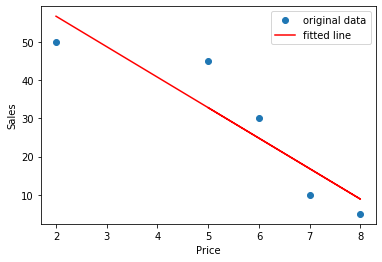

In [25]:
import matplotlib.pyplot as plt
plt.plot(X, Y, 'o', label='original data')
plt.plot(X, res.intercept + res.slope*np.array(X), 'r', label='fitted line')

plt.xlabel("Price")
plt.ylabel('Sales')
plt.legend()
plt.show()




<font color='Blue'>${\large Appendix : }$</font> 


$$X^TY =X^T X B $$





> The following is the expanded version:

$$ \left[ \begin{array} {} 1 & x_1 \\ 1 & x_2 \\ 1 & x_3 \\..\\1 & x_n   \end{array} \right] ^T \left[ \begin{array} {} y_1 \\ y_2 \\ y_3 \\ ..\\y_n   \end{array} \right] = \left[ \begin{array} {} 1 & x_1 \\ 1 & x_2 \\ 1 & x_3 \\..\\1 & x_n   \end{array} \right] ^T \left[ \begin{array} {} 1 & x_1 \\ 1 & x_2 \\ 1 & x_3 \\..\\1 & x_n   \end{array} \right]\left[ \begin{array} {} b_0 \\b_1   \end{array} \right]$$

> We can write $X^T$ in another way:

$$ \left[ \begin{array} {} 1 & 1 &1 &.. & 1 \\ x_1 & x_2 & x_3 & .. & x_n   \end{array} \right] \left[ \begin{array} {} y_1 \\ y_2 \\ y_3 \\ ..\\y_n   \end{array} \right] =  \left[ \begin{array} {} 1 & 1 &1 &.. & 1 \\ x_1 & x_2 & x_3 & .. & x_n   \end{array} \right] \left[ \begin{array} {} 1 & x_1 \\ 1 & x_2 \\ 1 & x_3 \\..\\1 & x_n   \end{array} \right]\left[ \begin{array} {} b_0 \\b_1   \end{array} \right]$$

> We can calculate $X^TY$ and $X^TX$:


$$ \left[ \begin{array} {} y_1+y_2+y_3+...+y_n  \\ x_1y_1+x_2y_2+x_3y_3+...+x_ny_n   \end{array} \right] =  \left[ \begin{array} {} 1+1+1+...+1 & x_1+x_2+x_3+...+x_n \\ x_1+x_2+x_3+...+x_n & x_1^2+x_2^2+x_3^2+...+x_n^2\end{array} \right]  \left[ \begin{array} {} b_0 \\b_1   \end{array} \right]$$